## Gait Video Project
### Correlation of classification results with Short Physical Performance Battery (SPBB) scores, a measure of frailty
* We will check the correlation (using visualization) between the classification performance (using binary correctly/incorrectly classified subject and continuous no. of strides correctly classified for each subject) and SPBB score (range 0-12) representing the frailty of the individual.
* This analysis will make sense only for subject (both on W and WT frameworks) and cross generalization since in task generalization, we already are ~9/10 correct, so we won't observe any patterns since we have very rare incorrectly classified subjects.
* Lower SPBB score = Lower balance = Higher frailty. 
* High SPBB score = Higher balance = Better lower extremity functions = Lower Frailty.
* HOAs with higher SPBB score (i.e. higher balance) are "more likely" to be correctly classified because their low fraily makes them an "easy group" to distinguish from the diseased with "potentially" higher fraily. Similarly, HOAs with a lower SPBB score or higher frailty are a "harder group" to distinguish from the MS/PD subjects, and thus, are "more likely" to be incorrectly classified.
* MS/PD on the other hand with higher SPBB score (i.e. higher balance) are "more likely" to behave like HOAs on our walking tasks and thus, are a "harder group" to differentiate from the HOAs. So, MS/PD subjects with higher SPBB are "more likely" to be incorrectly classified as HOA class. Similarly, MS/PD with lower SPBB score (i.e. lower balance) are "expected" to have distinguishing characteristics from HOAs, given their high frailty level, and thus are "more likely" to be an "easy group" to differentiate from HOAs and thus are "expected" to be correctly classified from the HOA class. 

### Simplex plot
* Let's fix an equilateral triangle with vertices v_1=(-\sqrt{3}/2,1/2), v_2=(\sqrt{3}/2,1/2), and v_3=(0,-1). Map a probability (p_1,p_2,p_3) into the point pv_1+pv_2+pv_3.  Thus (1/3,1/3,1/3) is mapped into zero since v_1+v_2+v_3=0.  Also,
* (1,0,0) is mapped into v_1,(0,1,0) is mapped into v_2, (0,0,1) is mapped into v_3.

* Within this framework, I suspect that the decision domains are given by connecting the origins to the midpoints of the sides.  That is the only thing that makes sense from the standpoint of permuting the names of the different vertices.


In [2]:
from importlib import reload
from ml_utils.imports import *
from matplotlib.lines import Line2D


In [3]:
# '''
# Run only once to get the SPBB file to use
# '''
# #Reading the two SPBB files containing the scores for PIDs used in our study
# spbb_file1 = pd.read_excel(spbb_path + 'spppbplus.xlsx')
# print (len(spbb_file1))
# spbb_file2 = pd.read_excel(spbb_path + 'SPPB_TMT_GDS_EDU_2.xlsx')
# print (len(spbb_file2))

# #Concatenating the subjects from the two files 
# spbb_concat = pd.concat([spbb_file1, spbb_file2], ignore_index=True)
# print (len(spbb_concat))

# #Selecting only the subjects used in this study and storing them to a separate csv file 
# #to use!
# spbb_reduced = spbb_concat[spbb_concat.Subject.isin(pids_used)].sort_values(by = 'Subject').reset_index()
# spbb_reduced.drop('index', axis = 1, inplace = True)
# print (len(spbb_reduced))
# display(spbb_reduced)
# spbb_reduced.to_csv(spbb_path + 'final_spbb_to_use.csv')

In [4]:
#Reading the SPPB scores 
spbb_path = 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\SeverityMetrics\\'

'''
SPBB file Header:
names(dat.behav_plus) <- c("subj", "Side-by-Side",	"Semi-Tandem", "Tandem", 
"TOTAL_BALANCE", "GAIT_SPEED", "REPEATED_CHAIR_STAND",	"SPPB_score",	
"TrailA_Time",	"TrailB_Time",	"Wheel1",	"Wheel1_Time",	"Wheel2",	
"Wheel2_Time",	"GDS_SCORE", "EDUCATION", "multilingual", "no_language",	
"First_FLUENCY",	"second_FLUENCY",	"Q2",	"Q3")
'''
#Use the overall score column as the SPBB score for analysis
balance_scores = pd.read_csv(spbb_path + 'final_spbb_to_use.csv', index_col = 0)

#Only keeping the overall score 
balance_scores = balance_scores[['Subject', 'Overall score']]
balance_scores.columns = ['PID', 'Overall balance score']

In [4]:
#Reading the best models person wise predictions 
model_path = 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\SeverityMetrics\\'
#This is Subject gen W Resnet best model with 78% person-accuracy from Colab
best_model_predictions_path = model_path + '[person_78]current_best_resnet_subject_genW_10May_2021_05_11-14_28_15_251278\\person_wise_predictions_W.csv'

prediction_df = pd.read_csv(best_model_predictions_path)
prediction_df.PID = prediction_df.PID.astype(int)
prediction_df['True Label'] = prediction_df['True Label'].astype(int)
prediction_df['Predicted Label'] = prediction_df['Predicted Label'].astype(int)
prediction_df = prediction_df.set_index('PID')
prediction_df.sort_index(inplace = True)

In [5]:
#Reducing the SPPB file to only PIDs used in the current prediction file
balance_scores_reduced = balance_scores[balance_scores['PID'].isin(prediction_df.index)].set_index('PID')
balance_scores_reduced.sort_index(inplace= True)

#Adding the corresponding balance scores to the predictions dataframe 
prediction_df['balance_score'] = balance_scores_reduced

In [6]:
#HOA at vertex v1 = (0, 1), PwMS at vertex v2 = (-sqrt(3)/2, -1/2), PwPD at vertex 
#v3 = (sqrt(3)/2, -1/2)
#Map the probability of prediction (p_HOA, p_MS, p_PD) to 2D point p_HOA*v1 + p_MS*v2 + p_PD*v3
#Probabilities (1/3, 1/3, 1/3) is then mapped to (0, 0) in this plot, prob. (1, 0, 0) to 
#HOA vertex v1, prob. (0, 1, 0) to PwMS vertex v2, prob (0, 0, 1) to PwPD vertex v3

#Vertices 
v_HOA, v_MS, v_PD = [0, 1], [-np.sqrt(3)/2, -1/2], [np.sqrt(3)/2, -1/2]

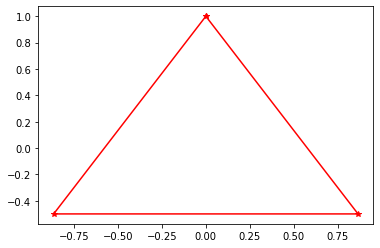

In [7]:
plt.plot([v_HOA[0], v_MS[0], v_PD[0], v_HOA[0]], [v_HOA[1], v_MS[1], v_PD[1], v_HOA[1]], 'r-*')
plt.show()

In [8]:
#x/y axis based on prediction probabilities and vertices of the traingle
prediction_df['x_axis'] = prediction_df['0']*v_HOA[0] + prediction_df['1']*v_MS[0] + prediction_df['2']*v_PD[0]
prediction_df['y_axis'] = prediction_df['0']*v_HOA[1] + prediction_df['1']*v_MS[1] + prediction_df['2']*v_PD[1]
display(prediction_df.head())

,0,1,2,True Label,Predicted Label,balance_score,x_axis,y_axis
PID,,,,,,,,
102,0.533333,0.155556,0.311111,0,0,11,0.134715,0.300000
112,0.645833,0.020833,0.333333,0,0,12,0.270633,0.468750
113,1.000000,0.000000,0.000000,0,0,12,0.000000,1.000000
115,0.653846,0.096154,0.250000,0,0,12,0.133235,0.480769
123,0.576271,0.000000,0.423729,0,0,12,0.366960,0.364407


In [9]:
#Edge color and shape for true label
edgecolor_HOA = 'k'
edgecolor_MS = 'k'
edgecolor_PD = 'k'
prediction_df['edgecolor'] =  edgecolor_HOA #HOA 
prediction_df['edgecolor'][prediction_df['True Label']==1] = edgecolor_MS #MS
prediction_df['edgecolor'][prediction_df['True Label']==2] = edgecolor_PD #PD

marker_HOA = 'o'
marker_MS = 's'
marker_PD = '^'

prediction_df['shape'] = marker_HOA #HOA 
prediction_df['shape'][prediction_df['True Label']==1] = marker_MS #MS
prediction_df['shape'][prediction_df['True Label']==2] = marker_PD #PD

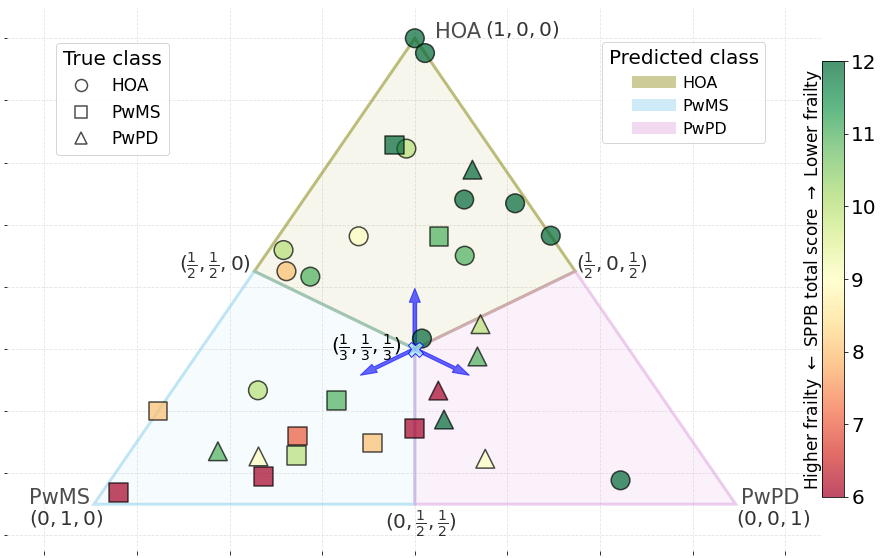

In [293]:
font = {'size'   : 17}

fig, ax = plt.subplots(figsize = (15, 10))
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.rcParams['axes.axisbelow'] = True

scatter1 = ax.scatter(prediction_df[prediction_df['True Label']==0]['x_axis'], \
                      prediction_df[prediction_df['True Label']==0]['y_axis'], \
                      c = prediction_df[prediction_df['True Label']==0]['balance_score'], \
                      s = 350,
                      marker = marker_HOA,
                      edgecolors =  prediction_df[prediction_df['True Label']==0]['edgecolor'],\
                      linewidths = 1.5,
                      cmap = 'RdYlGn', \
                      vmin = 6, vmax = 12, 
#                       edgecolors='mediumspringgreen',
#                      linewidths=1.5,
                      zorder = 3,
                      alpha = 0.7
                     )
scatter2 = ax.scatter(prediction_df[prediction_df['True Label']==1]['x_axis'], \
                      prediction_df[prediction_df['True Label']==1]['y_axis'], \
                     c = prediction_df[prediction_df['True Label']==1]['balance_score'], \
                      s = 350,
                      marker = marker_MS,
                      edgecolors =  prediction_df[prediction_df['True Label']==1]['edgecolor'],\
                      linewidths = 1.5,
                      cmap = 'RdYlGn', \
                      vmin = 6, vmax = 12, 
#                       edgecolors='mediumspringgreen',
#                      linewidths=1.5,
                      zorder = 3,
                      alpha = 0.7
                     )
scatter3 = ax.scatter(prediction_df[prediction_df['True Label']==2]['x_axis'], \
                      prediction_df[prediction_df['True Label']==2]['y_axis'], \
                       c = prediction_df[prediction_df['True Label']==2]['balance_score'], \
                      s = 350,
                      marker = marker_PD,
                      edgecolors =  prediction_df[prediction_df['True Label']==2]['edgecolor'],\
                      linewidths = 1.5,
                      cmap = 'RdYlGn', \
                      vmin = 6, vmax = 12, 
#                       edgecolors='mediumspringgreen',
#                      linewidths=1.5,
                      zorder = 3,
                      alpha = 0.7
                     )

#Plotting the triangular boundary and the centroid showing (1/3, 1/3, 1/3)
# ax.plot([v_HOA[0], v_MS[0], v_PD[0], v_HOA[0]], [v_HOA[1], v_MS[1], v_PD[1], v_HOA[1]], '-', \
#        markersize = '20', color = 'dodgerblue', alpha = 0.7, linewidth = 3)
ax.plot(0, 0, 'X', color = 'paleturquoise', markersize = 15, zorder = 10, alpha = 0.8, markeredgecolor = 'blue') #paleturquoise

#Colorbar to show the SPPB 
cb = fig.colorbar(scatter2, ax=ax, fraction=.026, ticks = [6, 7, 8, 9, 10, 11, 12], pad = 0.0)
cb.set_label(label=r'Higher frailty $\leftarrow$ SPPB total score $\rightarrow$ Lower frailty',fontdict=font, labelpad = -75.0, rotation = 90, color = 'k', zorder = 5)
cb.set_ticklabels(['6', '7', '8', '9', '10', '11', '12'])
# cb.ax.get_yticklabels()[0].set_bbox(dict(facecolor="tomato", alpha=0.15, edgecolor = "None"))
# cb.ax.get_yticklabels()[6].set_bbox(dict(facecolor="lightgreen", alpha=0.15, edgecolor = "None"))
cb.ax.tick_params(labelsize=20)
cb.ax.yaxis.set_ticks_position('right')
cb.ax.xaxis.set_ticks_position('bottom')

#True class legend
legend_elements = [Line2D([0], [0], marker= marker_HOA, markeredgecolor= edgecolor_HOA, label='HOA',
                          markerfacecolor='w', markersize=12, linestyle = 'None', markeredgewidth = 1.5, alpha = 0.7),
                  Line2D([0], [0], marker=marker_MS, markeredgecolor=edgecolor_MS, label='PwMS',
                          markerfacecolor='w', markersize=12, linestyle = 'None', markeredgewidth = 1.5, alpha = 0.7),
                  Line2D([0], [0], marker=marker_PD, markeredgecolor=edgecolor_PD, label='PwPD',
                          markerfacecolor='w', markersize=12, linestyle = 'None', markeredgewidth = 1.5, alpha = 0.7)]

# ax.plot([0, 0], [0, -0.5], '-', color = 'dodgerblue', markersize = '20', alpha = 0.7, linewidth = 3)
# ax.plot([0, np.sqrt(3)/4.0], [0, 1/4.0], '-', color = 'dodgerblue', markersize = '20', alpha = 0.7, linewidth = 3)
# ax.plot([0, -np.sqrt(3)/4.0], [0, 1/4.0], '-', color = 'dodgerblue', markersize = '20', alpha = 0.7, linewidth = 3)

style = dict(size=21, color='k', alpha = 0.7)
plt.annotate("HOA", # this is the text
             (v_HOA[0], v_HOA[1]), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(20, 0), # distance from text to points (x,y)
#                  ha='center',
             **style,
            ) # horizontal alignment can be left, right or center
plt.annotate("PwMS", # this is the text
             (v_MS[0], v_MS[1]), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(-65, 0), # distance from text to points (x,y)
#                  ha='center',
             **style,
            ) # horizontal alignment can be left, right or center
plt.annotate("PwPD", # this is the text
             (v_PD[0], v_PD[1]), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(5, 0), # distance from text to points (x,y)
#                  ha='center',
             **style,
            ) # horizontal alignment can be left, right or center

ax.fill([0, np.sqrt(3)/4.0, 0, -np.sqrt(3)/4.0],  [1, 1/4.0, 0, 1/4.0], facecolor=(0.5019607843137255, 0.5019607843137255, 0.0,0.07), edgecolor=(0.5019607843137255, 0.5019607843137255, 0.0,0.5), linewidth=3)
ax.fill([0, 0, -np.sqrt(3)/4.0, -np.sqrt(3)/2.0],  [-1/2, 0, 1/4.0, -1/2.0], facecolor=(0.5294117647058824, 0.807843137254902, 0.9215686274509803,0.07), edgecolor=(0.5294117647058824, 0.807843137254902, 0.9215686274509803, 0.5), linewidth=3)
ax.fill([0, 0, np.sqrt(3)/2.0, np.sqrt(3)/4.0],  [0, -1/2.0, -1/2, 1/4.0], facecolor=(0.8666666666666667, 0.6274509803921569, 0.866666666666666, 0.14), edgecolor=(0.8666666666666667, 0.6274509803921569, 0.866666666666666, 0.5), linewidth=3)

plt.setp(ax.get_xticklabels(), Fontsize=17) 
plt.setp(ax.get_yticklabels(), Fontsize=17) 
leg1 = ax.legend(handles=legend_elements, title = 'True class', fontsize = 17, title_fontsize = 20, labelcolor = ['k', 'k', 'k'],\
         loc = 'upper left', bbox_to_anchor=(0.05,0.95))

legend_elements2 = [Line2D([0], [0], color= (0.5019607843137255, 0.5019607843137255, 0.0,0.4), label='HOA', linewidth = 12, alpha = 0.4),
                  Line2D([0], [0], color= (0.5294117647058824, 0.807843137254902, 0.9215686274509803,0.4), label='PwMS',linewidth = 12, alpha = 0.4),
                  Line2D([0], [0], color= (0.8666666666666667, 0.6274509803921569, 0.866666666666666, 0.4), label='PwPD',linewidth = 12, alpha = 0.4)]
leg2 = ax.legend(handles=legend_elements2, title = 'Predicted class', fontsize = 16, title_fontsize = 20, labelcolor = ['k', 'k', 'k'],\
         loc = 'best', bbox_to_anchor=(0.72,0.95))
ax.add_artist(leg1)

plt.xlim([-1.1, 1.1])
plt.ylim([-0.65, 1.1])

# #To show that position in the plot represents the predicted probability for 3 classes 
style2 = dict(size=20, color='k', alpha = 0.8)
style3 = dict(size=20, color='k', alpha = 1)
plt.annotate(r'$(\frac{1}{3}, \frac{1}{3}, \frac{1}{3})$', # this is the text
             (-0.24, -0.05), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(5, 11), # distance from text to points (x,y)
#                  ha='center',
             **style3,
            ) # horizontal alignment can be left, right or center
plt.annotate(r'$(1, 0, 0)$', # this is the text
             (v_HOA[0], v_HOA[1]), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(70, 3), # distance from text to points (x,y)
#                  ha='center',
             **style2,
            ) # horizontal alignment can be left, right or center
plt.annotate(r'$(0, 1, 0)$', # this is the text
             (v_MS[0], v_MS[1]), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(-65, -20), # distance from text to points (x,y)
#                  ha='center',
             **style2,
            ) # horizontal alignment can be left, right or center
plt.annotate(r'$(0, 0, 1)$', # this is the text
             (v_PD[0], v_PD[1]), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(0, -20), # distance from text to points (x,y)
#                  ha='center',
             **style2,
            ) # horizontal alignment can be left, right or center
plt.annotate(r'$(0, \frac{1}{2}, \frac{1}{2})$', # this is the text
             (0,-1/2), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(-30, -25), # distance from text to points (x,y)
#                  ha='center',
             **style2,
            ) # horizontal alignment can be left, right or center
plt.annotate(r'$(\frac{1}{2}, \frac{1}{2}, 0)$', # this is the text
             (-np.sqrt(3)/4, 1/4), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(-75, 0), # distance from text to points (x,y)
#                  ha='center',
             **style2,
            ) # horizontal alignment can be left, right or center
plt.annotate(r'$(\frac{1}{2}, 0, \frac{1}{2})$', # this is the text
             (np.sqrt(3)/4, 1/4), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(1, 0), # distance from text to points (x,y)
#                  ha='center',
             **style2,
            ) # horizontal alignment can be left, right or center

#To show the axis as 3D 
plt.arrow(0, 0, 0, 0.15, color = 'blue', alpha = 0.6, width = 0.01)
plt.arrow(0, 0, np.sqrt(3)/16, -1/16, color = 'blue', alpha = 0.6, width = 0.01)
plt.arrow(0, 0, -np.sqrt(3)/16, -1/16, color = 'blue', alpha = 0.6, width = 0.01)
# plt.axis('off')
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.grid(True, linestyle='--', color = 'lightgrey', alpha = 0.6)
plt.savefig('severity_analysis.png', dpi = 350)

plt.show()

In [167]:
prediction_df.shape

(32, 10)

In [269]:
from matplotlib import colors
colors.to_rgb('skyblue')

(0.5294117647058824, 0.807843137254902, 0.9215686274509803)

### EDSS and H&Y scale associations 

In [26]:
edss_hy= pd.read_csv('C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\subject_clinical_measures.csv')

In [31]:
print ('EDSS stats:', edss_hy['EDSS'].min(), edss_hy['EDSS'].max(), edss_hy['EDSS'].mean(), edss_hy['EDSS'].std())
print ('H&Y stats:', edss_hy['PD severity score'].min(), edss_hy['PD severity score'].max(), edss_hy['PD severity score'].mean(), \
      edss_hy['PD severity score'].std())

EDSS stats: 2.0 6.0 4.95 1.4033689623347254
H&Y stats: 1.0 4.0 1.6666666666666667 0.9999999999999999


In [30]:
edss_hy

,PID,"gender (1-female, 2-male)",age (yrs),height (m),weight (kg),cohort,EDSS,balance score,PD severity score
0,212,1,48,1.60020,65.900000,HOA,NaN,10.0,NaN
1,213,1,65,1.72720,77.600000,HOA,NaN,11.0,NaN
2,214,1,64,1.66370,52.100000,HOA,NaN,10.0,NaN
3,215,2,55,1.75260,86.200000,HOA,NaN,10.0,NaN
4,216,1,65,1.68910,55.200000,HOA,NaN,9.0,NaN
5,217,2,50,1.80340,121.000000,HOA,NaN,12.0,NaN
6,218,1,57,1.75260,62.000000,HOA,NaN,12.0,NaN
7,219,1,63,1.75260,72.700000,HOA,NaN,8.0,NaN
8,102,2,64,1.96000,88.591837,HOA,NaN,11.0,NaN
9,112,1,75,1.59000,60.265306,HOA,NaN,12.0,NaN


# Cross gen 

In [5]:
#Reading the best models person wise predictions 
model_path = 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\SeverityMetrics\\'
#This is Subject gen W Resnet best model with 78% person-accuracy from Colab
best_model_predictions_path = model_path + 'crossgenbestmodel793\\person_wise_predictions_task_and_subject_WtoWT.csv'

prediction_df = pd.read_csv(best_model_predictions_path)
prediction_df.PID = prediction_df.PID.astype(int)
prediction_df['True Label'] = prediction_df['True Label'].astype(int)
prediction_df['Predicted Label'] = prediction_df['Predicted Label'].astype(int)
prediction_df = prediction_df.set_index('PID')
prediction_df.sort_index(inplace = True)

In [6]:
#Reducing the SPPB file to only PIDs used in the current prediction file
balance_scores_reduced = balance_scores[balance_scores['PID'].isin(prediction_df.index)].set_index('PID')
balance_scores_reduced.sort_index(inplace= True)

#Adding the corresponding balance scores to the predictions dataframe 
prediction_df['balance_score'] = balance_scores_reduced

In [7]:
#HOA at vertex v1 = (0, 1), PwMS at vertex v2 = (-sqrt(3)/2, -1/2), PwPD at vertex 
#v3 = (sqrt(3)/2, -1/2)
#Map the probability of prediction (p_HOA, p_MS, p_PD) to 2D point p_HOA*v1 + p_MS*v2 + p_PD*v3
#Probabilities (1/3, 1/3, 1/3) is then mapped to (0, 0) in this plot, prob. (1, 0, 0) to 
#HOA vertex v1, prob. (0, 1, 0) to PwMS vertex v2, prob (0, 0, 1) to PwPD vertex v3

#Vertices 
v_HOA, v_MS, v_PD = [0, 1], [-np.sqrt(3)/2, -1/2], [np.sqrt(3)/2, -1/2]

In [8]:
#x/y axis based on prediction probabilities and vertices of the traingle
prediction_df['x_axis'] = prediction_df['0']*v_HOA[0] + prediction_df['1']*v_MS[0] + prediction_df['2']*v_PD[0]
prediction_df['y_axis'] = prediction_df['0']*v_HOA[1] + prediction_df['1']*v_MS[1] + prediction_df['2']*v_PD[1]
display(prediction_df.head())

,0,1,2,True Label,Predicted Label,balance_score,x_axis,y_axis
PID,,,,,,,,
212,0.630435,0.369565,0.000000,0,0,10,-0.320053,0.445652
213,0.800000,0.133333,0.066667,0,0,11,-0.057735,0.700000
214,0.578947,0.263158,0.157895,0,0,10,-0.091161,0.368421
215,0.431818,0.318182,0.250000,0,0,10,-0.059047,0.147727
216,0.857143,0.071429,0.071429,0,0,9,0.000000,0.785714


In [9]:
#Edge color and shape for true label
edgecolor_HOA = 'k'
edgecolor_MS = 'k'
edgecolor_PD = 'k'
prediction_df['edgecolor'] =  edgecolor_HOA #HOA 
prediction_df['edgecolor'][prediction_df['True Label']==1] = edgecolor_MS #MS
prediction_df['edgecolor'][prediction_df['True Label']==2] = edgecolor_PD #PD

marker_HOA = 'o'
marker_MS = 's'
marker_PD = '^'

prediction_df['shape'] = marker_HOA #HOA 
prediction_df['shape'][prediction_df['True Label']==1] = marker_MS #MS
prediction_df['shape'][prediction_df['True Label']==2] = marker_PD #PD

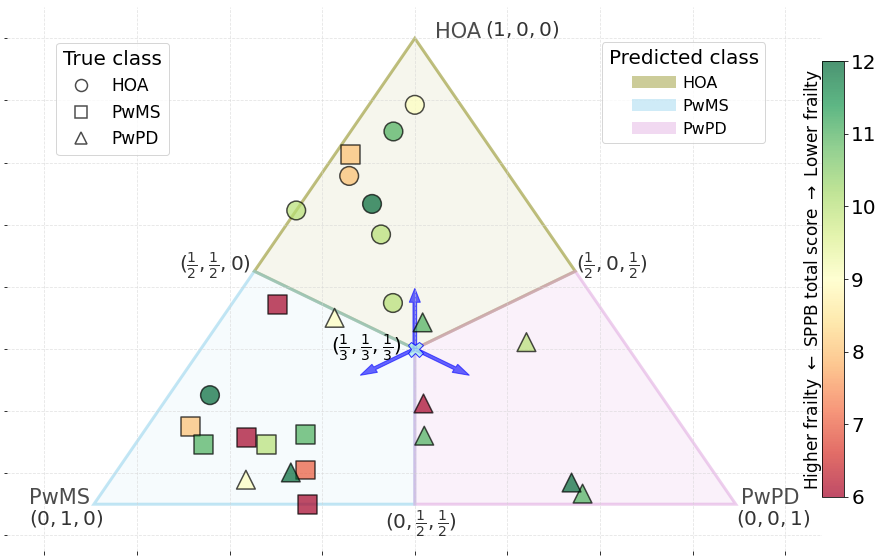

In [10]:
font = {'size'   : 17}

fig, ax = plt.subplots(figsize = (15, 10))
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.rcParams['axes.axisbelow'] = True

scatter1 = ax.scatter(prediction_df[prediction_df['True Label']==0]['x_axis'], \
                      prediction_df[prediction_df['True Label']==0]['y_axis'], \
                      c = prediction_df[prediction_df['True Label']==0]['balance_score'], \
                      s = 350,
                      marker = marker_HOA,
                      edgecolors =  prediction_df[prediction_df['True Label']==0]['edgecolor'],\
                      linewidths = 1.5,
                      cmap = 'RdYlGn', \
                      vmin = 6, vmax = 12, 
#                       edgecolors='mediumspringgreen',
#                      linewidths=1.5,
                      zorder = 3,
                      alpha = 0.7
                     )
scatter2 = ax.scatter(prediction_df[prediction_df['True Label']==1]['x_axis'], \
                      prediction_df[prediction_df['True Label']==1]['y_axis'], \
                     c = prediction_df[prediction_df['True Label']==1]['balance_score'], \
                      s = 350,
                      marker = marker_MS,
                      edgecolors =  prediction_df[prediction_df['True Label']==1]['edgecolor'],\
                      linewidths = 1.5,
                      cmap = 'RdYlGn', \
                      vmin = 6, vmax = 12, 
#                       edgecolors='mediumspringgreen',
#                      linewidths=1.5,
                      zorder = 3,
                      alpha = 0.7
                     )
scatter3 = ax.scatter(prediction_df[prediction_df['True Label']==2]['x_axis'], \
                      prediction_df[prediction_df['True Label']==2]['y_axis'], \
                       c = prediction_df[prediction_df['True Label']==2]['balance_score'], \
                      s = 350,
                      marker = marker_PD,
                      edgecolors =  prediction_df[prediction_df['True Label']==2]['edgecolor'],\
                      linewidths = 1.5,
                      cmap = 'RdYlGn', \
                      vmin = 6, vmax = 12, 
#                       edgecolors='mediumspringgreen',
#                      linewidths=1.5,
                      zorder = 3,
                      alpha = 0.7
                     )

#Plotting the triangular boundary and the centroid showing (1/3, 1/3, 1/3)
# ax.plot([v_HOA[0], v_MS[0], v_PD[0], v_HOA[0]], [v_HOA[1], v_MS[1], v_PD[1], v_HOA[1]], '-', \
#        markersize = '20', color = 'dodgerblue', alpha = 0.7, linewidth = 3)
ax.plot(0, 0, 'X', color = 'paleturquoise', markersize = 15, zorder = 10, alpha = 0.8, markeredgecolor = 'blue') #paleturquoise

#Colorbar to show the SPPB 
cb = fig.colorbar(scatter2, ax=ax, fraction=.026, ticks = [6, 7, 8, 9, 10, 11, 12], pad = 0.0)
cb.set_label(label=r'Higher frailty $\leftarrow$ SPPB total score $\rightarrow$ Lower frailty',fontdict=font, labelpad = -75.0, rotation = 90, color = 'k', zorder = 5)
cb.set_ticklabels(['6', '7', '8', '9', '10', '11', '12'])
# cb.ax.get_yticklabels()[0].set_bbox(dict(facecolor="tomato", alpha=0.15, edgecolor = "None"))
# cb.ax.get_yticklabels()[6].set_bbox(dict(facecolor="lightgreen", alpha=0.15, edgecolor = "None"))
cb.ax.tick_params(labelsize=20)
cb.ax.yaxis.set_ticks_position('right')
cb.ax.xaxis.set_ticks_position('bottom')

#True class legend
legend_elements = [Line2D([0], [0], marker= marker_HOA, markeredgecolor= edgecolor_HOA, label='HOA',
                          markerfacecolor='w', markersize=12, linestyle = 'None', markeredgewidth = 1.5, alpha = 0.7),
                  Line2D([0], [0], marker=marker_MS, markeredgecolor=edgecolor_MS, label='PwMS',
                          markerfacecolor='w', markersize=12, linestyle = 'None', markeredgewidth = 1.5, alpha = 0.7),
                  Line2D([0], [0], marker=marker_PD, markeredgecolor=edgecolor_PD, label='PwPD',
                          markerfacecolor='w', markersize=12, linestyle = 'None', markeredgewidth = 1.5, alpha = 0.7)]

# ax.plot([0, 0], [0, -0.5], '-', color = 'dodgerblue', markersize = '20', alpha = 0.7, linewidth = 3)
# ax.plot([0, np.sqrt(3)/4.0], [0, 1/4.0], '-', color = 'dodgerblue', markersize = '20', alpha = 0.7, linewidth = 3)
# ax.plot([0, -np.sqrt(3)/4.0], [0, 1/4.0], '-', color = 'dodgerblue', markersize = '20', alpha = 0.7, linewidth = 3)

style = dict(size=21, color='k', alpha = 0.7)
plt.annotate("HOA", # this is the text
             (v_HOA[0], v_HOA[1]), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(20, 0), # distance from text to points (x,y)
#                  ha='center',
             **style,
            ) # horizontal alignment can be left, right or center
plt.annotate("PwMS", # this is the text
             (v_MS[0], v_MS[1]), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(-65, 0), # distance from text to points (x,y)
#                  ha='center',
             **style,
            ) # horizontal alignment can be left, right or center
plt.annotate("PwPD", # this is the text
             (v_PD[0], v_PD[1]), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(5, 0), # distance from text to points (x,y)
#                  ha='center',
             **style,
            ) # horizontal alignment can be left, right or center

ax.fill([0, np.sqrt(3)/4.0, 0, -np.sqrt(3)/4.0],  [1, 1/4.0, 0, 1/4.0], facecolor=(0.5019607843137255, 0.5019607843137255, 0.0,0.07), edgecolor=(0.5019607843137255, 0.5019607843137255, 0.0,0.5), linewidth=3)
ax.fill([0, 0, -np.sqrt(3)/4.0, -np.sqrt(3)/2.0],  [-1/2, 0, 1/4.0, -1/2.0], facecolor=(0.5294117647058824, 0.807843137254902, 0.9215686274509803,0.07), edgecolor=(0.5294117647058824, 0.807843137254902, 0.9215686274509803, 0.5), linewidth=3)
ax.fill([0, 0, np.sqrt(3)/2.0, np.sqrt(3)/4.0],  [0, -1/2.0, -1/2, 1/4.0], facecolor=(0.8666666666666667, 0.6274509803921569, 0.866666666666666, 0.14), edgecolor=(0.8666666666666667, 0.6274509803921569, 0.866666666666666, 0.5), linewidth=3)

plt.setp(ax.get_xticklabels(), Fontsize=17) 
plt.setp(ax.get_yticklabels(), Fontsize=17) 
leg1 = ax.legend(handles=legend_elements, title = 'True class', fontsize = 17, title_fontsize = 20, labelcolor = ['k', 'k', 'k'],\
         loc = 'upper left', bbox_to_anchor=(0.05,0.95))

legend_elements2 = [Line2D([0], [0], color= (0.5019607843137255, 0.5019607843137255, 0.0,0.4), label='HOA', linewidth = 12, alpha = 0.4),
                  Line2D([0], [0], color= (0.5294117647058824, 0.807843137254902, 0.9215686274509803,0.4), label='PwMS',linewidth = 12, alpha = 0.4),
                  Line2D([0], [0], color= (0.8666666666666667, 0.6274509803921569, 0.866666666666666, 0.4), label='PwPD',linewidth = 12, alpha = 0.4)]
leg2 = ax.legend(handles=legend_elements2, title = 'Predicted class', fontsize = 16, title_fontsize = 20, labelcolor = ['k', 'k', 'k'],\
         loc = 'best', bbox_to_anchor=(0.72,0.95))
ax.add_artist(leg1)

plt.xlim([-1.1, 1.1])
plt.ylim([-0.65, 1.1])

# #To show that position in the plot represents the predicted probability for 3 classes 
style2 = dict(size=20, color='k', alpha = 0.8)
style3 = dict(size=20, color='k', alpha = 1)
plt.annotate(r'$(\frac{1}{3}, \frac{1}{3}, \frac{1}{3})$', # this is the text
             (-0.24, -0.05), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(5, 11), # distance from text to points (x,y)
#                  ha='center',
             **style3,
            ) # horizontal alignment can be left, right or center
plt.annotate(r'$(1, 0, 0)$', # this is the text
             (v_HOA[0], v_HOA[1]), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(70, 3), # distance from text to points (x,y)
#                  ha='center',
             **style2,
            ) # horizontal alignment can be left, right or center
plt.annotate(r'$(0, 1, 0)$', # this is the text
             (v_MS[0], v_MS[1]), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(-65, -20), # distance from text to points (x,y)
#                  ha='center',
             **style2,
            ) # horizontal alignment can be left, right or center
plt.annotate(r'$(0, 0, 1)$', # this is the text
             (v_PD[0], v_PD[1]), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(0, -20), # distance from text to points (x,y)
#                  ha='center',
             **style2,
            ) # horizontal alignment can be left, right or center
plt.annotate(r'$(0, \frac{1}{2}, \frac{1}{2})$', # this is the text
             (0,-1/2), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(-30, -25), # distance from text to points (x,y)
#                  ha='center',
             **style2,
            ) # horizontal alignment can be left, right or center
plt.annotate(r'$(\frac{1}{2}, \frac{1}{2}, 0)$', # this is the text
             (-np.sqrt(3)/4, 1/4), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(-75, 0), # distance from text to points (x,y)
#                  ha='center',
             **style2,
            ) # horizontal alignment can be left, right or center
plt.annotate(r'$(\frac{1}{2}, 0, \frac{1}{2})$', # this is the text
             (np.sqrt(3)/4, 1/4), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(1, 0), # distance from text to points (x,y)
#                  ha='center',
             **style2,
            ) # horizontal alignment can be left, right or center

#To show the axis as 3D 
plt.arrow(0, 0, 0, 0.15, color = 'blue', alpha = 0.6, width = 0.01)
plt.arrow(0, 0, np.sqrt(3)/16, -1/16, color = 'blue', alpha = 0.6, width = 0.01)
plt.arrow(0, 0, -np.sqrt(3)/16, -1/16, color = 'blue', alpha = 0.6, width = 0.01)
# plt.axis('off')
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.grid(True, linestyle='--', color = 'lightgrey', alpha = 0.6)
plt.savefig('severity_analysis_crossgen_793.png', dpi = 350)

plt.show()

# Subject gen WT

In [11]:
#Reading the best models person wise predictions 
model_path = 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\SeverityMetrics\\'
#This is Subject gen W Resnet best model with 78% person-accuracy from Colab
best_model_predictions_path = model_path + 'subjectgenwtbestmodel75computer16\\person_wise_predictions_WT.csv'

prediction_df = pd.read_csv(best_model_predictions_path)
prediction_df.PID = prediction_df.PID.astype(int)
prediction_df['True Label'] = prediction_df['True Label'].astype(int)
prediction_df['Predicted Label'] = prediction_df['Predicted Label'].astype(int)
prediction_df = prediction_df.set_index('PID')
prediction_df.sort_index(inplace = True)

In [12]:
#Reducing the SPPB file to only PIDs used in the current prediction file
balance_scores_reduced = balance_scores[balance_scores['PID'].isin(prediction_df.index)].set_index('PID')
balance_scores_reduced.sort_index(inplace= True)

#Adding the corresponding balance scores to the predictions dataframe 
prediction_df['balance_score'] = balance_scores_reduced

In [13]:
#HOA at vertex v1 = (0, 1), PwMS at vertex v2 = (-sqrt(3)/2, -1/2), PwPD at vertex 
#v3 = (sqrt(3)/2, -1/2)
#Map the probability of prediction (p_HOA, p_MS, p_PD) to 2D point p_HOA*v1 + p_MS*v2 + p_PD*v3
#Probabilities (1/3, 1/3, 1/3) is then mapped to (0, 0) in this plot, prob. (1, 0, 0) to 
#HOA vertex v1, prob. (0, 1, 0) to PwMS vertex v2, prob (0, 0, 1) to PwPD vertex v3

#Vertices 
v_HOA, v_MS, v_PD = [0, 1], [-np.sqrt(3)/2, -1/2], [np.sqrt(3)/2, -1/2]

In [14]:
#x/y axis based on prediction probabilities and vertices of the traingle
prediction_df['x_axis'] = prediction_df['0']*v_HOA[0] + prediction_df['1']*v_MS[0] + prediction_df['2']*v_PD[0]
prediction_df['y_axis'] = prediction_df['0']*v_HOA[1] + prediction_df['1']*v_MS[1] + prediction_df['2']*v_PD[1]
display(prediction_df.head())

,0,1,2,True Label,Predicted Label,balance_score,x_axis,y_axis
PID,,,,,,,,
212,0.543478,0.326087,0.130435,0,0,10,-0.169440,0.315217
213,0.822222,0.177778,0.000000,0,0,11,-0.153960,0.733333
214,0.421053,0.421053,0.157895,0,0,10,-0.227901,0.131579
215,0.431818,0.409091,0.159091,0,0,10,-0.216506,0.147727
216,0.714286,0.166667,0.119048,0,0,9,-0.041239,0.571429


In [15]:
#Edge color and shape for true label
edgecolor_HOA = 'k'
edgecolor_MS = 'k'
edgecolor_PD = 'k'
prediction_df['edgecolor'] =  edgecolor_HOA #HOA 
prediction_df['edgecolor'][prediction_df['True Label']==1] = edgecolor_MS #MS
prediction_df['edgecolor'][prediction_df['True Label']==2] = edgecolor_PD #PD

marker_HOA = 'o'
marker_MS = 's'
marker_PD = '^'

prediction_df['shape'] = marker_HOA #HOA 
prediction_df['shape'][prediction_df['True Label']==1] = marker_MS #MS
prediction_df['shape'][prediction_df['True Label']==2] = marker_PD #PD

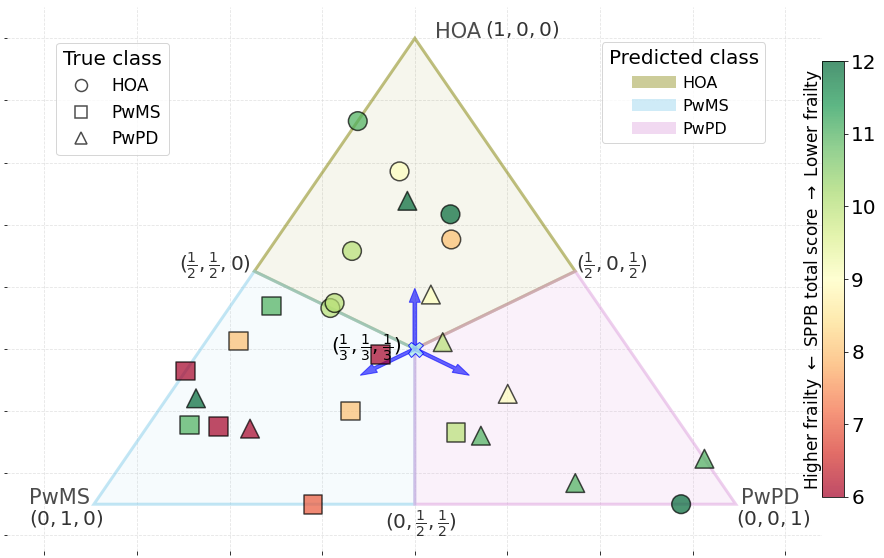

In [16]:
font = {'size'   : 17}

fig, ax = plt.subplots(figsize = (15, 10))
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.rcParams['axes.axisbelow'] = True

scatter1 = ax.scatter(prediction_df[prediction_df['True Label']==0]['x_axis'], \
                      prediction_df[prediction_df['True Label']==0]['y_axis'], \
                      c = prediction_df[prediction_df['True Label']==0]['balance_score'], \
                      s = 350,
                      marker = marker_HOA,
                      edgecolors =  prediction_df[prediction_df['True Label']==0]['edgecolor'],\
                      linewidths = 1.5,
                      cmap = 'RdYlGn', \
                      vmin = 6, vmax = 12, 
#                       edgecolors='mediumspringgreen',
#                      linewidths=1.5,
                      zorder = 3,
                      alpha = 0.7
                     )
scatter2 = ax.scatter(prediction_df[prediction_df['True Label']==1]['x_axis'], \
                      prediction_df[prediction_df['True Label']==1]['y_axis'], \
                     c = prediction_df[prediction_df['True Label']==1]['balance_score'], \
                      s = 350,
                      marker = marker_MS,
                      edgecolors =  prediction_df[prediction_df['True Label']==1]['edgecolor'],\
                      linewidths = 1.5,
                      cmap = 'RdYlGn', \
                      vmin = 6, vmax = 12, 
#                       edgecolors='mediumspringgreen',
#                      linewidths=1.5,
                      zorder = 3,
                      alpha = 0.7
                     )
scatter3 = ax.scatter(prediction_df[prediction_df['True Label']==2]['x_axis'], \
                      prediction_df[prediction_df['True Label']==2]['y_axis'], \
                       c = prediction_df[prediction_df['True Label']==2]['balance_score'], \
                      s = 350,
                      marker = marker_PD,
                      edgecolors =  prediction_df[prediction_df['True Label']==2]['edgecolor'],\
                      linewidths = 1.5,
                      cmap = 'RdYlGn', \
                      vmin = 6, vmax = 12, 
#                       edgecolors='mediumspringgreen',
#                      linewidths=1.5,
                      zorder = 3,
                      alpha = 0.7
                     )

#Plotting the triangular boundary and the centroid showing (1/3, 1/3, 1/3)
# ax.plot([v_HOA[0], v_MS[0], v_PD[0], v_HOA[0]], [v_HOA[1], v_MS[1], v_PD[1], v_HOA[1]], '-', \
#        markersize = '20', color = 'dodgerblue', alpha = 0.7, linewidth = 3)
ax.plot(0, 0, 'X', color = 'paleturquoise', markersize = 15, zorder = 10, alpha = 0.8, markeredgecolor = 'blue') #paleturquoise

#Colorbar to show the SPPB 
cb = fig.colorbar(scatter2, ax=ax, fraction=.026, ticks = [6, 7, 8, 9, 10, 11, 12], pad = 0.0)
cb.set_label(label=r'Higher frailty $\leftarrow$ SPPB total score $\rightarrow$ Lower frailty',fontdict=font, labelpad = -75.0, rotation = 90, color = 'k', zorder = 5)
cb.set_ticklabels(['6', '7', '8', '9', '10', '11', '12'])
# cb.ax.get_yticklabels()[0].set_bbox(dict(facecolor="tomato", alpha=0.15, edgecolor = "None"))
# cb.ax.get_yticklabels()[6].set_bbox(dict(facecolor="lightgreen", alpha=0.15, edgecolor = "None"))
cb.ax.tick_params(labelsize=20)
cb.ax.yaxis.set_ticks_position('right')
cb.ax.xaxis.set_ticks_position('bottom')

#True class legend
legend_elements = [Line2D([0], [0], marker= marker_HOA, markeredgecolor= edgecolor_HOA, label='HOA',
                          markerfacecolor='w', markersize=12, linestyle = 'None', markeredgewidth = 1.5, alpha = 0.7),
                  Line2D([0], [0], marker=marker_MS, markeredgecolor=edgecolor_MS, label='PwMS',
                          markerfacecolor='w', markersize=12, linestyle = 'None', markeredgewidth = 1.5, alpha = 0.7),
                  Line2D([0], [0], marker=marker_PD, markeredgecolor=edgecolor_PD, label='PwPD',
                          markerfacecolor='w', markersize=12, linestyle = 'None', markeredgewidth = 1.5, alpha = 0.7)]

# ax.plot([0, 0], [0, -0.5], '-', color = 'dodgerblue', markersize = '20', alpha = 0.7, linewidth = 3)
# ax.plot([0, np.sqrt(3)/4.0], [0, 1/4.0], '-', color = 'dodgerblue', markersize = '20', alpha = 0.7, linewidth = 3)
# ax.plot([0, -np.sqrt(3)/4.0], [0, 1/4.0], '-', color = 'dodgerblue', markersize = '20', alpha = 0.7, linewidth = 3)

style = dict(size=21, color='k', alpha = 0.7)
plt.annotate("HOA", # this is the text
             (v_HOA[0], v_HOA[1]), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(20, 0), # distance from text to points (x,y)
#                  ha='center',
             **style,
            ) # horizontal alignment can be left, right or center
plt.annotate("PwMS", # this is the text
             (v_MS[0], v_MS[1]), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(-65, 0), # distance from text to points (x,y)
#                  ha='center',
             **style,
            ) # horizontal alignment can be left, right or center
plt.annotate("PwPD", # this is the text
             (v_PD[0], v_PD[1]), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(5, 0), # distance from text to points (x,y)
#                  ha='center',
             **style,
            ) # horizontal alignment can be left, right or center

ax.fill([0, np.sqrt(3)/4.0, 0, -np.sqrt(3)/4.0],  [1, 1/4.0, 0, 1/4.0], facecolor=(0.5019607843137255, 0.5019607843137255, 0.0,0.07), edgecolor=(0.5019607843137255, 0.5019607843137255, 0.0,0.5), linewidth=3)
ax.fill([0, 0, -np.sqrt(3)/4.0, -np.sqrt(3)/2.0],  [-1/2, 0, 1/4.0, -1/2.0], facecolor=(0.5294117647058824, 0.807843137254902, 0.9215686274509803,0.07), edgecolor=(0.5294117647058824, 0.807843137254902, 0.9215686274509803, 0.5), linewidth=3)
ax.fill([0, 0, np.sqrt(3)/2.0, np.sqrt(3)/4.0],  [0, -1/2.0, -1/2, 1/4.0], facecolor=(0.8666666666666667, 0.6274509803921569, 0.866666666666666, 0.14), edgecolor=(0.8666666666666667, 0.6274509803921569, 0.866666666666666, 0.5), linewidth=3)

plt.setp(ax.get_xticklabels(), Fontsize=17) 
plt.setp(ax.get_yticklabels(), Fontsize=17) 
leg1 = ax.legend(handles=legend_elements, title = 'True class', fontsize = 17, title_fontsize = 20, labelcolor = ['k', 'k', 'k'],\
         loc = 'upper left', bbox_to_anchor=(0.05,0.95))

legend_elements2 = [Line2D([0], [0], color= (0.5019607843137255, 0.5019607843137255, 0.0,0.4), label='HOA', linewidth = 12, alpha = 0.4),
                  Line2D([0], [0], color= (0.5294117647058824, 0.807843137254902, 0.9215686274509803,0.4), label='PwMS',linewidth = 12, alpha = 0.4),
                  Line2D([0], [0], color= (0.8666666666666667, 0.6274509803921569, 0.866666666666666, 0.4), label='PwPD',linewidth = 12, alpha = 0.4)]
leg2 = ax.legend(handles=legend_elements2, title = 'Predicted class', fontsize = 16, title_fontsize = 20, labelcolor = ['k', 'k', 'k'],\
         loc = 'best', bbox_to_anchor=(0.72,0.95))
ax.add_artist(leg1)

plt.xlim([-1.1, 1.1])
plt.ylim([-0.65, 1.1])

# #To show that position in the plot represents the predicted probability for 3 classes 
style2 = dict(size=20, color='k', alpha = 0.8)
style3 = dict(size=20, color='k', alpha = 1)
plt.annotate(r'$(\frac{1}{3}, \frac{1}{3}, \frac{1}{3})$', # this is the text
             (-0.24, -0.05), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(5, 11), # distance from text to points (x,y)
#                  ha='center',
             **style3,
            ) # horizontal alignment can be left, right or center
plt.annotate(r'$(1, 0, 0)$', # this is the text
             (v_HOA[0], v_HOA[1]), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(70, 3), # distance from text to points (x,y)
#                  ha='center',
             **style2,
            ) # horizontal alignment can be left, right or center
plt.annotate(r'$(0, 1, 0)$', # this is the text
             (v_MS[0], v_MS[1]), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(-65, -20), # distance from text to points (x,y)
#                  ha='center',
             **style2,
            ) # horizontal alignment can be left, right or center
plt.annotate(r'$(0, 0, 1)$', # this is the text
             (v_PD[0], v_PD[1]), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(0, -20), # distance from text to points (x,y)
#                  ha='center',
             **style2,
            ) # horizontal alignment can be left, right or center
plt.annotate(r'$(0, \frac{1}{2}, \frac{1}{2})$', # this is the text
             (0,-1/2), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(-30, -25), # distance from text to points (x,y)
#                  ha='center',
             **style2,
            ) # horizontal alignment can be left, right or center
plt.annotate(r'$(\frac{1}{2}, \frac{1}{2}, 0)$', # this is the text
             (-np.sqrt(3)/4, 1/4), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(-75, 0), # distance from text to points (x,y)
#                  ha='center',
             **style2,
            ) # horizontal alignment can be left, right or center
plt.annotate(r'$(\frac{1}{2}, 0, \frac{1}{2})$', # this is the text
             (np.sqrt(3)/4, 1/4), # these are the coordinates to position the label
             textcoords="offset points", # how to position the text
             xytext=(1, 0), # distance from text to points (x,y)
#                  ha='center',
             **style2,
            ) # horizontal alignment can be left, right or center

#To show the axis as 3D 
plt.arrow(0, 0, 0, 0.15, color = 'blue', alpha = 0.6, width = 0.01)
plt.arrow(0, 0, np.sqrt(3)/16, -1/16, color = 'blue', alpha = 0.6, width = 0.01)
plt.arrow(0, 0, -np.sqrt(3)/16, -1/16, color = 'blue', alpha = 0.6, width = 0.01)
# plt.axis('off')
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.grid(True, linestyle='--', color = 'lightgrey', alpha = 0.6)
plt.savefig('severity_analysis_subject_gen_WT_75.png', dpi = 350)

plt.show()